In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [136]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [11]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

#station_tab = pd.read_sql("SELECT * FROM station ", conn)
#station_tab.head()



,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [6]:
Base = automap_base()
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)



# reflect the tables


In [133]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [134]:
# Find the most recent date in the data set.
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(max_date)

('2017-08-23',)


('2017-08-23',)
SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.date >= ?
['2016-08-23', '2016-08-24', '2016-08-25', '2016-08-26', '2016-08-27', '2016-08-28', '2016-08-29', '2016-08-30', '2016-08-31', '2016-09-01', '2016-09-02', '2016-09-03', '2016-09-04', '2016-09-05', '2016-09-06', '2016-09-07', '2016-09-08', '2016-09-09', '2016-09-10', '2016-09-11', '2016-09-12', '2016-09-13', '2016-09-14', '2016-09-15', '2016-09-16', '2016-09-17', '2016-09-18', '2016-09-19', '2016-09-20', '2016-09-21', '2016-09-22', '2016-09-23', '2016-09-24', '2016-09-25', '2016-09-26', '2016-09-27', '2016-09-28', '2016-09-29', '2016-09-30', '2016-10-01', '2016-10-02', '2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06', '2016-10-07', '2016-10-08', '2016-10-09', '2016-10-10', '2016-10-11', '2016-10-12', '2016-10-13', '2016-10-1

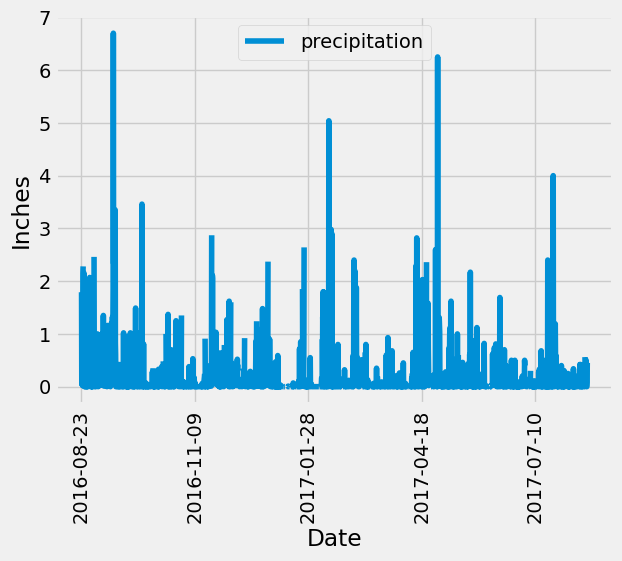

In [131]:


# Calculate the date one year from the last date in data set.
last_12_months = session.query(Measurement).filter(Measurement.date >= "2016-08-23" )

print(last_12_months)


date = []
precipitation = []
# Perform a query to retrieve the data and precipitation scores
for twelve_mon in last_12_months:
    date.append(twelve_mon.date)
    precipitation.append(twelve_mon.prcp)


print(date)
print(precipitation)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame({'date': date, 'precipitation':precipitation})

# Sort the dataframe by date
sorted_prec_df = precipitation_df.sort_values(by = ['date'])

# Use Pandas Plotting with Matplotlib to plot the data
sorted_prec_df.plot(x='date',y='precipitation', rot = 90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()


In [132]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_prec_df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [144]:
# Design a query to calculate the total number of stations in the dataset

station_count = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(station_count)


id
station
date
prcp
tobs
id
station
name
latitude
longitude
elevation
[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [147]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List _the stations and their counts in descending order.
stationcount = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
display(station_count)


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [151]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_analysis = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
temp_analysis

[(54.0, 85.0, 71.66378066378067)]

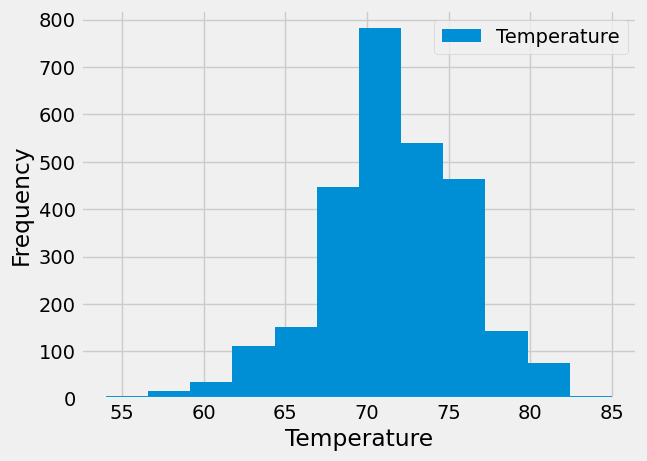

In [161]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_month_data = session.query(Measurement).filter(Measurement.station == 'USC00519281' and Measurement.date >= '2016-08-23')
twelve_month_data

temp_twelve_mth_list = []

for row in twelve_month_data:
    temp_twelve_mth_list.append(row.tobs)

tobs_df = pd.DataFrame({'Temperature' : temp_twelve_mth_list})    
tobs_df 

plt.hist(tobs_df['Temperature'], bins = 12, label='Temperature')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.legend()

# Close Session

In [162]:
# Close Session
session.close()